In [1]:
#conda install -c conda-forge xarray dask netCDF4 bottleneck
#conda install -c conda-forge cfgrib
#conda install -c conda-forge geopandas
#conda install -c conda-forge rasterio
#pip install pyproj==2.6.1.post1

#pip install pyshp

In [2]:
import xarray as xr
import salem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = xr.open_dataset('MERGE_CPTEC_20210901.grib2', engine='cfgrib') #Carregando os dados.
data

<xarray.Dataset>
Dimensions:     (latitude: 924, longitude: 1001)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 340.0
    valid_time  datetime64[ns] ...
Data variables:
    prec        (latitude, longitude) float32 ...
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2021-12-25T14:48 GRIB to CDM+CF via cfgrib-0.9.9...

In [4]:
data.to_netcdf('MERGE.nc')  #Salvando os dados e convertendo para o formato nc.

In [5]:
ds = salem.open_xr_dataset('MERGE.nc')
ds.coords['longitude'] = ((ds.coords['longitude'] + 180) % 360) - 180
ds = ds.sortby(ds.longitude)
ds

<xarray.Dataset>
Dimensions:     (latitude: 924, longitude: 1001)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    valid_time  datetime64[ns] ...
Data variables:
    prec        (latitude, longitude) float32 ...
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2021-12-25T14:48 GRIB to CDM+CF via cfgrib-0.9.9...
    pyproj_srs:              +proj=longlat +datum=WGS84 +no_defs

In [6]:
ds.coords['longitude'].values

array([-120.05, -119.95, -119.85, ...,  -20.25,  -20.15,  -20.05])

In [8]:
shp = salem.read_shapefile('tiete.shp')
shp


,bacia,subbacia,psat,geometry,min_x,max_x,min_y,max_y
0,Tietê,Edgard de Souza,PSATESZ,"POLYGON ((-46.99325 -23.80211, -46.99701 -23.7...",-47.096497,-45.637390,-23.952393,-23.331787
1,Tietê,Barra Bonita,PSATBBO,"POLYGON ((-47.00098 -23.79340, -47.05328 -23.8...",-48.592590,-45.869202,-23.874817,-22.062317
2,Tietê,Ibitinga,PSATIBT,"POLYGON ((-48.30144 -21.61761, -48.30157 -21.6...",-49.536682,-47.688110,-22.791016,-21.617608
3,Tietê,Nova Avanhandava,PSATNAV,"POLYGON ((-48.32458 -21.62372, -48.32492 -21.6...",-50.343384,-48.287109,-22.081909,-20.695312


In [9]:
dsr = ds.salem.roi(shape=shp).sel(latitude=slice(-25, -20), longitude=slice(-52, -44))
dsr

<xarray.Dataset>
Dimensions:     (latitude: 50, longitude: 80)
Coordinates:
    time        datetime64[ns] 2021-09-01T12:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 -24.95 -24.85 -24.75 ... -20.25 -20.15 -20.05
  * longitude   (longitude) float64 -51.95 -51.85 -51.75 ... -44.15 -44.05
    valid_time  datetime64[ns] 2021-09-01T12:00:00
Data variables:
    prec        (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    prmsl       (latitude, longitude) float32 nan nan nan nan ... nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2021-12-25T14:48 GRIB to CDM+CF via cfgrib-0.9.9...
    pyproj_srs:              +proj=longlat +datum=WGS84 +no_defs

In [19]:
dsr.prmsl

<xarray.DataArray 'prmsl' (latitude: 50, longitude: 80)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time        datetime64[ns] 2021-09-01T12:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 -24.95 -24.85 -24.75 ... -20.25 -20.15 -20.05
  * longitude   (longitude) float64 -51.95 -51.85 -51.75 ... -44.15 -44.05
    valid_time  datetime64[ns] 2021-09-01T12:00:00
Attributes:
    GRIB_paramId:                             260074
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      924924
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  1001
    GRIB_Ny:                                  924
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           prmsl
    GRIB_gridDefinitionDescription:           Latitude/longitude. Also called...
    GRIB_iDirectionIncrementInDegrees:        0.1
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.1
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    1
    GRIB_latitudeOfFirstGridPointInDegrees:   -60.05
    GRIB_latitudeOfLastGridPointInDegrees:    32.25
    GRIB_longitudeOfFirstGridPointInDegrees:  239.95
    GRIB_longitudeOfLastGridPointInDegrees:   339.95
    GRIB_missingValue:                        9999
    GRIB_name:                                Pressure reduced to MSL
    GRIB_shortName:                           prmsl
    GRIB_units:                               Pa
    long_name:                                Pressure reduced to MSL
    units:                                    Pa
    standard_name:                            unknown
    pyproj_srs:                               +proj=longlat +datum=WGS84 +no_...

In [24]:
#dsr.coords['longitude'].values
len(dsr.coords['latitude'].values)

50

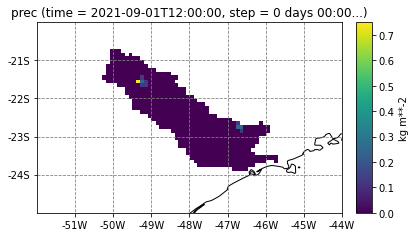

In [11]:
dsr.prec.salem.quick_map()


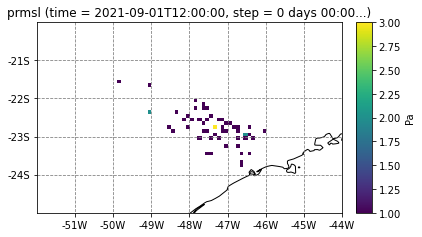

In [12]:
dsr.prmsl.salem.quick_map();


In [28]:
df = pd.DataFrame(dsr.data_vars['prmsl'].values)
df = df.set_index(dsr.coords['latitude'].values)
df.columns = dsr.coords['longitude'].values
df

,-51.95,-51.85,-51.75,-51.65,-51.55,-51.45,-51.35,-51.25,-51.15,-51.05,...,-44.95,-44.85,-44.75,-44.65,-44.55,-44.45,-44.35,-44.25,-44.15,-44.05
-24.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_prec = pd.DataFrame(dsr.prec.values)
df_prec = df.set_index(dsr.coords['latitude'].values)
df_prec.columns = dsr.coords['longitude'].values
df_prec

,-51.95,-51.85,-51.75,-51.65,-51.55,-51.45,-51.35,-51.25,-51.15,-51.05,...,-44.95,-44.85,-44.75,-44.65,-44.55,-44.45,-44.35,-44.25,-44.15,-44.05
-24.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-24.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#por padrão o method utilizado é o 'np.mean'
dsl = dsr.salem.lookup_transform(ds)
dsl

<xarray.Dataset>
Dimensions:     (longitude: 80, latitude: 50)
Coordinates:
    time        datetime64[ns] 2021-09-01T12:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    valid_time  datetime64[ns] 2021-09-01T12:00:00
  * longitude   (longitude) float64 -51.95 -51.85 -51.75 ... -44.15 -44.05
  * latitude    (latitude) float64 -24.95 -24.85 -24.75 ... -20.25 -20.15 -20.05
Data variables:
    prec        (latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.375 0.125
    prmsl       (latitude, longitude) float32 nan nan nan nan ... nan nan 1.0
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs